# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import getpass 
import statsmodels.api as sm

In [51]:
Age = np.array([17,51,27,21,36,48,19,26,52,30])
Tardies = np.array([10,1,5,9,4,2,9,6,0,3])

In [52]:
# Your code here. 
student_data = pd.DataFrame({'x': Age, 'y':Tardies})
student_data

,x,y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,52,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='x', ylabel='y'>

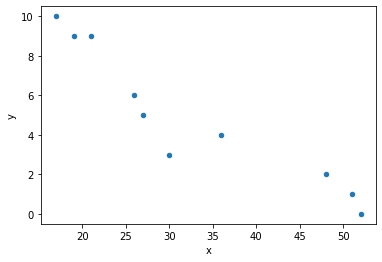

In [53]:
student_data.plot(kind='scatter', x='x',y='y')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

# there is a negative correlation between age and tardiness

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [54]:
np.cov(Age,Tardies,ddof=1)

array([[178.67777778, -44.47777778],
       [-44.47777778,  12.54444444]])

In [55]:
np.corrcoef(Age,Tardies)

array([[ 1.        , -0.93946822],
       [-0.93946822,  1.        ]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [56]:
# There is a strong negative coerrelation between those variables. (negative coef)
# there is also a negative relationship between those two (negative cov)
# coef is between -1 to +1, cov can be between -∞ to +∞,

Plot your regression model on your scatter plot.

In [57]:
df = sm.add_constant(student_data.x)

In [58]:
import statsmodels.api as sm

In [59]:
model = sm.OLS(student_data.y,df).fit()
model.summary()

C:\Users\gaohan\anaconda3\envs\matrix\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     60.14
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           5.46e-05
Time:                        12:31:50   Log-Likelihood:                -15.598
No. Observations:                  10   AIC:                             35.20
Df Residuals:                       8   BIC:                             35.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0399      1.126     11.583      0.000      10.444      15.636
x             -0.2489      0.032     -7.755      0.000      -0.323      -0.175
==============================================================================
Omnibus:                        3.489   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                1.562
Skew:                          -0.968   Prob(JB):                        0.458
Kurtosis:                       2.960   Cond. No.                         97.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [60]:
results = sm.OLS(df['y'],df[['const','x']]).fit()

KeyError: 'y'

In [35]:
results.summary()

C:\Users\gaohan\anaconda3\envs\matrix\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     60.14
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           5.46e-05
Time:                        12:05:41   Log-Likelihood:                -15.598
No. Observations:                  10   AIC:                             35.20
Df Residuals:                       8   BIC:                             35.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0399      1.126     11.583      0.000      10.444      15.636
x             -0.2489      0.032     -7.755      0.000      -0.323      -0.175
==============================================================================
Omnibus:                        3.489   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                1.562
Skew:                          -0.968   Prob(JB):                        0.458
Kurtosis:                       2.960   Cond. No.                         97.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TypeError: add_constant() missing 1 required positional argument: 'data'

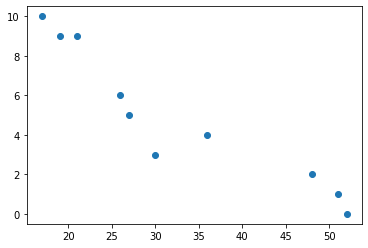

In [37]:
plt.scatter(Age,Tardies)
x = sm.add_constant()
plt.plot(Age, results.predict(df)) 

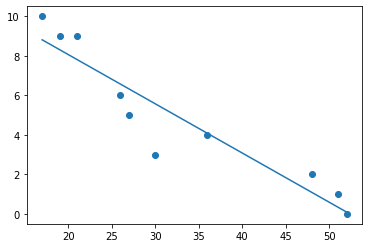

In [34]:
plt.scatter(Age,Tardies)
plt.plot(np.unique(Age), np.poly1d(np.polyfit(Age, Tardies, 1))(np.unique(Age)))

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
dfv = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [4]:
corrresul = dfv.corr()

In [5]:
corrresul.drop(['Year', 'City MPG', 'Engine Displacement','Cylinders','Fuel Barrels/Year','Highway MPG','Combined MPG','Fuel Cost/Year'], axis=1, inplace=True)

In [6]:
corrresul.drop(['Engine Displacement','City MPG', 'Highway MPG','CO2 Emission Grams/Mile'], inplace=True)

In [7]:
corrresul

# the least helpful information is the year, because the absolute value is lower than all other absolute values

,CO2 Emission Grams/Mile
Year,-0.222300
Cylinders,0.752393
Fuel Barrels/Year,0.986189
Combined MPG,-0.926229
Fuel Cost/Year,0.930865


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

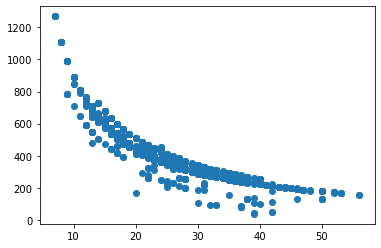

In [8]:
plt.scatter(dfv['Combined MPG'],dfv['CO2 Emission Grams/Mile'])

<AxesSubplot:xlabel='Combined MPG', ylabel='CO2 Emission Grams/Mile'>

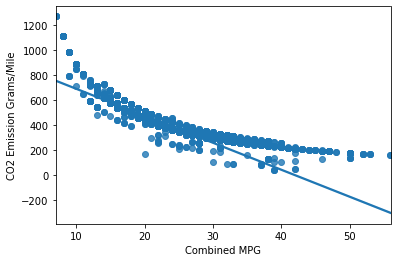

In [15]:
sns.regplot(x=dfv['Combined MPG'], y=dfv['CO2 Emission Grams/Mile'], data=corrresul)

In [18]:
model = sm.OLS(dfv['CO2 Emission Grams/Mile'],dfv[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Tue, 08 Sep 2020   Prob (F-statistic):                        0.00
Time:                             12:03:11   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(dfv[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]], dfv["CO2 Emission Grams/Mile"])
print(mlr.intercept_)
print(mlr.coef_)

769.8882836465727
[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 